In [1]:
import keras
keras.__version__

'2.8.0'

# Introducción a las convnets: Clasificando números



Vamos a echarle un vistazo a un ejemplo sencillo de una convnet. La utilizaremos para clasificar el dataset MNIST, que es un dataset abierto que contiene números escritos a mano. 

![Números escritos a mano del dataset MNIST](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Vamos a crear una primera convnet basica. Es una pila de capas `Conv2D` y `MaxPooling2D`. 
Lo importante es notar que una convnet toma como input tensores de tamaño `(altura_imagen, anchura_imagen, canales_imagen)`. 
Para ello primero hay que averiguar el tamaño de las imágenes de nuestro dataset. 

La red debe tener las siguientes capas:

- Una capa convolucional (Conv2D) con 32 filtros de 3x3 y activación relu. En esta primera capa deberás indicar el tamaño del input (input_shape).
- Una segunda capa de Max Pooling (MaxPooling2D) de 2x2
- Una tercera capa convolucional con 64 filtros de 3x3 y activación relu
- Una cuarta capa de Max Pooling (MaxPooling2D) de 2x2
- Una quinta capa convolucional de 64 filtros de 3x3 y activación relu

Sabrás que lo has hecho bien cuando el output de model.summary() sea:

![imagen_output.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output.png?raw=true)


In [2]:
from keras import layers
from keras import models

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [5]:
# from keras import backend as K 
# K.clear_session()

Puedes ver arriba que la salida de cada capa `Conv2D` y `MaxPooling2D` es un tensor 3D de dimensiones `(altura, anchura, canales)`. La anchura y la altura tienden a diminuir según vamos yendo mas profundo en la red. El número de canales está controlado por el primer argumento que se le pasa a 
las capas `Conv2D`  (e.j. 32 o 64).

El siguiente paso sería darle nuestro ultimo tensor (de dimensiones `(3, 3, 64)`) como entrada a una red densamente conectada. 
Estos clasificadores procesan vectores, que son 1D,  mientras que nuestra salida es un tensor 3D. 
Así que primero tendremos que aplanar nuestra salida 3D y convertirla en 1D y después añadir unas cuantas capas densas:

- Primero aplana la salida (flatten())
- Añade una primera capa de 64 neuronas y activación relu
- Añade una última capa de 10 neuronas (tantas como números puedes clasificar) y activación softwmax

Sabrás que lo has hecho bien cuando el summary tenga esta pinta:

![imagen_output_flat.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output_flat.png?raw=true)

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Queremos clasificar 10 categorías, lo que significa que nuestra capa final debe tener 10 nodos y una función de activación softmax. Vamos a ver que pinta tiene nuestra red:

Como puedes ver, nuestra salida de dimension `(3, 3, 64)` han sido aplanadas hasta convertirse en vectores de dimensión `(576,)`, antes de entrar en las dos capas densas.

Vamos ahora a entrenar nuestra red con las imágenes del dataset MNIST.

Leemos a continuación el dataset y lo metemos dentro de vectores: train_images, train_labels, test_images, test_labels

Antes de continuar, imprime:

- ¿Cual es el tamaño del dataset de training?
- ¿Qué pinta tiene el dataset de training?
- ¿Qué pinta tienen las etiquetas de training?
- Imprime la cuarta imagen del dataset de training


In [8]:
import numpy as np
import tensorflow
from tensorflow import keras

from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras import backend as k

import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [9]:
#1. ¿Cual es el tamaño del dataset de training?
print("Tamaño del data set Training Predictores:")
print(x_train.shape)
print("Tamaño del data set Training Predictando:")
print(y_train.shape)

Tamaño del data set Training Predictores:
(60000, 28, 28)
Tamaño del data set Training Predictando:
(60000,)


In [10]:
#2. ¿Qué pinta tiene el dataset de training?
x_train
#Cada valor es una matriz de 28x28 donde si hay un 0 significa un pixel negro y si hay un
#1 significa que el pixel es blanco

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
#3. ¿Qué pinta tienen las etiquetas de training?
y_train
#Son las etiquetas de los numeros pixelados en el dataset training

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

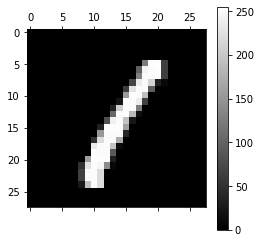

In [12]:
#4. Imprime la cuarta imagen del dataset de training
plt.matshow(x_train[3], cmap = 'gray')
plt.colorbar()
plt.show()

A continuación vas a darle la forma adecuada a los datasets de training y test para poder meterlos a la red neuronal. Pasa las labels, que ahora mismo son números, a su forma categórica.

In [13]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)


Compila el modelo indicando cuales son los datos de entrenamiento y sus etiquetas. Utilizando el optimizador "rmsprop" y como loss function usa la entropía cruzada categórica.
Entrena después el modelo durante 5 épocas y un tamaño de batch de 64.

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])
model.fit(x_train, 
          y_train, 
          epochs=5, 
          batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 17ms/step - loss: 0.1764 - accuracy: 0.9458
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0481 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0330 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0204 - accuracy: 0.9939


Vamos a evaluar el modelo con las imágenes de test:

In [24]:
#Voy a ver tambien los valores en training
train_loss, train_acc = model.evaluate(x_train, y_train)
print(train_acc)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - accuracy: 0.9969
0.9969000220298767


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9929


Imprime la accuracy del test que acabas de realizar:

In [16]:
print(test_acc)

0.992900013923645


Crea una imagen con un número escrito a mano y mira cual es la predicción. Prueba con unos cuantos números...¿Lo hace bien? 

In [17]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

img_width=28
img_height=28

img = image.load_img('ocho.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)

C:\Users\pcalatayud\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Carga el modelo que acabas de guardar (load) y haz una predicción (predict_classes) con la imágen del número que acabas de escribir.



In [18]:
from keras.models import load_model

In [19]:
model.save('CNN_PABLO_CALATAYUD_MNIST.h5')

In [20]:
model = load_model('CNN_PABLO_CALATAYUD_MNIST.h5')

In [21]:
numero_list=model.predict(x)

In [22]:
numero=np.argmax(np.array(numero_list))

Numero predicho: 8


<Figure size 432x288 with 0 Axes>

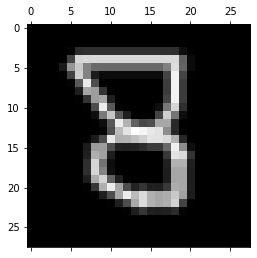

In [23]:
print("Numero predicho:",numero)
plt.gray() 
plt.matshow(img) 
plt.show() 

In [ ]:
#El modelo acierta el numero entregado como input
#Conclusion

#Con redes neuronales de deep learning convoluciones es 
#posible hacertar un 99% en el dataset train de MNIST
#y acertar un 99% de las veces en el dataset de test. 

#Son resultados bastante impresionantes que demuestran 
#el potencial de las redes convolucionales. En los modelos vistos anteriormente
#en el master estabamos en torno al 90%